In [38]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd


In [25]:
#LOADING THE DATASET

data = pd.read_csv("C:/Freelance/mri_data/BSE_BET_DATA/labels.csv")

df=pd.DataFrame(data)
df.head()

,Filename,Recognizable-Facial-Feature,Brain-Feature-Loss
0,IXI369-Guys-0924-T1_bet_03.nii,Yes,No
1,IXI448-HH-2393-T1_bet_07.nii,Yes,No
2,IXI252-HH-1693-T1_bet_08.nii,Yes,No
3,IXI188-Guys-0798-T1_bet_17.nii,Yes,No
4,IXI182-Guys-0792-T1_bet_17.nii,Yes,No


In [18]:
df.count()

Filename                       2060
Recognizable-Facial-Feature    2060
Brain-Feature-Loss             2060
dtype: int64

In [19]:
df.columns

Index(['Filename', 'Recognizable-Facial-Feature', 'Brain-Feature-Loss'], dtype='object')

In [20]:
df.shape

(2060, 3)

In [29]:
df["Recognizable-Facial-Feature"].value_counts()

No     1347
Yes     713
Name: Recognizable-Facial-Feature, dtype: int64

In [30]:
df["Brain-Feature-Loss"].value_counts()

Yes    1332
No      728
Name: Brain-Feature-Loss, dtype: int64

In [34]:
#DROPPING FILENAME FOR MODEL TRAINING

df_train=df.drop(["Filename"],axis=1)
df_train.value_counts()

Recognizable-Facial-Feature  Brain-Feature-Loss
No                           Yes                   1332
Yes                          No                     713
No                           No                      15
dtype: int64

In [33]:
df_train

,Recognizable-Facial-Feature,Brain-Feature-Loss
0,Yes,No
1,Yes,No
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
2055,No,Yes
2056,No,Yes
2057,Yes,No
2058,No,Yes


In [47]:
import nibabel

image1=r"C:/Freelance/mri_data/BSE_BET_DATA/files/IXI002-Guys-0828-T1_bet_5.nii.gz"
image1_l=nibabel.load(image1)



In [49]:
imagedata1=image1_l.get_fdata()
imagedata1.shape

(256, 256, 150)

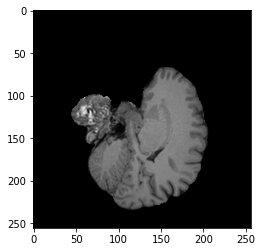

In [55]:
plt.imshow(imagedata1[:,:,90],cmap='gray')

In [58]:
print(image1_l.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 150   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.        0.9375    0.9375    1.199997  0.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.4:ddd0a010'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.46817502
quatern_c       : -0.5299171
quatern_d       : -0.46817502
qoffset_x       : -88.63989


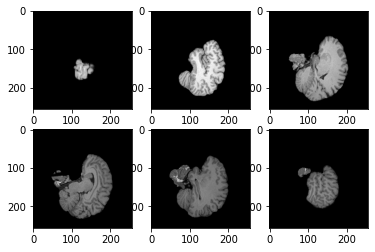

In [81]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(imagedata1[:,:,20*(i+1)],cmap='gray')
plt.show()    

In [69]:
imagedata1.shape

(256, 256, 150)

For missing data i.e.,  the pixel values for some images are not proper as mentioned in the report. 
It can be handled by using cv2.resize(Standardizing all the images).In the model building part.